## Introduction

This study will use Indian Liver Patient Dataset(ILPD). It was sourced from the northeastern part of Andhra Pradesh, India. The dataset is often used for developing predictive models that can help in diagnosing liver diseases such as hepatitis.This dataset is valuable for training and testing predictive models due to its comprehensive set of liver-related features and its focus on an Indian demographic, offering insights specific to that population.

## Data loading

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

columns = ['Age', 'Gender', 'TB', 'DB','Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Selector']

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv", 
                 header=None, names=columns)

## Data exploration 

This dataset includes 583 samples.Every entry describes patient characteristics (10 features intotal) and a label about liver diseases (1: presence of disease, 2: no presence of disease).

In [2]:
# print the first 5 lines in the dataset
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# check the columns and variable type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
# check some baisc statistics about the features. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
TB,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
DB,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkphos,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Sgpt,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Sgot,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
TP,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
ALB,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
A/G Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Selector,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [5]:
# Print the number of liver-disease patients and non-liver disease patients
print("Positive records:", df['Selector'].value_counts().iloc[0])
print("Negative records:", df['Selector'].value_counts().iloc[1])

Positive records: 416
Negative records: 167


This output confirms that the dataset has 416 positive and 167 negative records. This indicates that this is a highly imbalanced dataset.

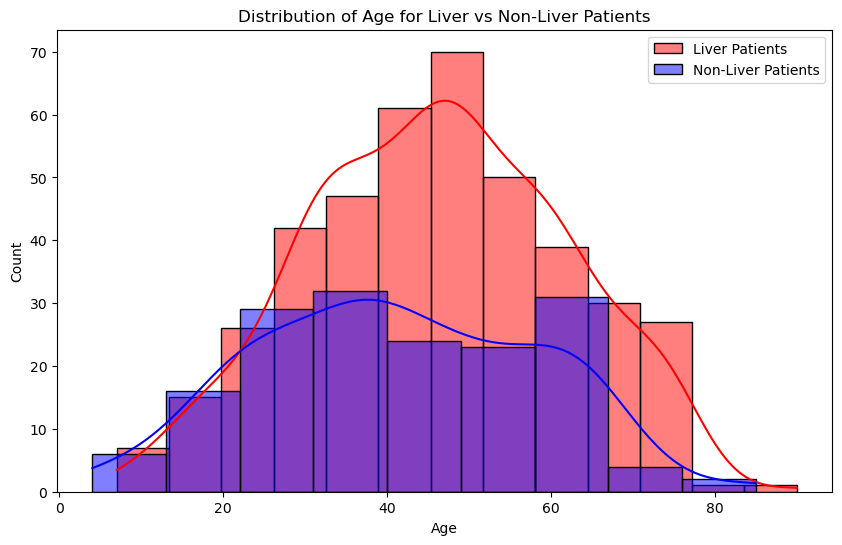

In [6]:
# plot the distribution of age among liver patients and non-liver patients 
liver_patients = df[df['Selector'] == 1]
non_liver_patients = df[df['Selector'] == 2]

plt.figure(figsize=(10, 6))
sns.histplot(data=liver_patients, x='Age', color='red', label='Liver Patients', kde=True)
sns.histplot(data=non_liver_patients, x='Age', color='blue', label='Non-Liver Patients', kde=True)
plt.title('Distribution of Age for Liver vs Non-Liver Patients')
plt.legend()

plt.show()

The above plot indicates that liver disease can affect individuals of any age, yet it predominantly affects those in middle age.

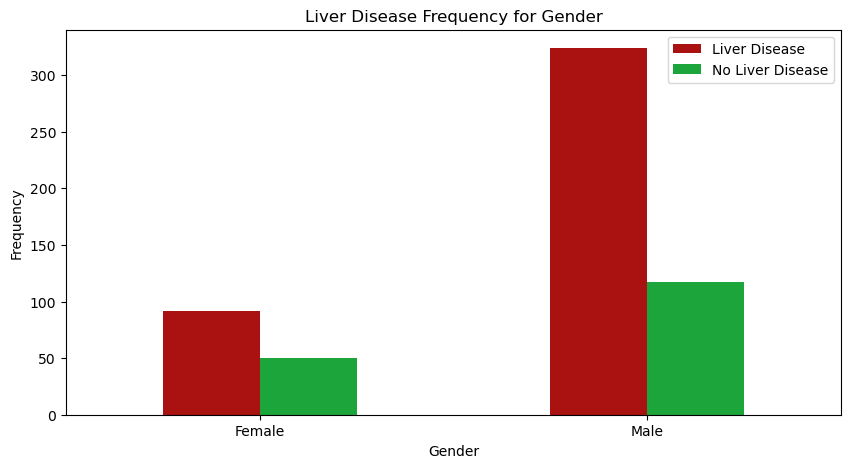

In [7]:
# comparing the frequency of liver disease presence across Female and Male.
pd.crosstab(df['Gender'], df['Selector']).plot(kind='bar', figsize=(10, 5), color=['#AA1111','#1CA53B'])
plt.title('Liver Disease Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["Liver Disease", "No Liver Disease"])

plt.show()

Men have a higher number and prevalence of liver disease than women.

In [8]:
# check missing value in each features
print('Checking missing data:')
df.isnull().any()

Checking missing data:


Age          False
Gender       False
TB           False
DB           False
Alkphos      False
Sgpt         False
Sgot         False
TP           False
ALB          False
A/G Ratio     True
Selector     False
dtype: bool

In [9]:
# check the four missing instancces
df[df['A/G Ratio'].isnull()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


Based on the outputs above, the Albumin-Globulin Ratio feature has four missing values. Since a very small fraction of values are missing(4/583), and the four records seem random. I choose to drop those particular rows which have missing data. 

There are other options like:

1. A constant value that has meaning within the domain, such as 0, distinct from all other values.
2. A mean, median or mode value for the column.


## Data cleaning

In [2]:
#Remove rows with missing values
df = df.dropna(how = 'any', axis = 0)

In [3]:
#Transfrom Gender string into float values
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df.loc[:,'Gender'] = le.transform(df['Gender'])

The original variable type is string, here use encoder to change the type to integer for subsequent model training.

In [16]:
#Overview of the 'clean' dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        579 non-null    int64  
 1   Gender     579 non-null    int32  
 2   TB         579 non-null    float64
 3   DB         579 non-null    float64
 4   Alkphos    579 non-null    int64  
 5   Sgpt       579 non-null    int64  
 6   Sgot       579 non-null    int64  
 7   TP         579 non-null    float64
 8   ALB        579 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   579 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 52.0 KB


The 'clean' dataset has 579 records, the only two categorical variables are gender and selector.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'TB'}>],
       [<Axes: title={'center': 'DB'}>,
        <Axes: title={'center': 'Alkphos'}>,
        <Axes: title={'center': 'Sgpt'}>],
       [<Axes: title={'center': 'Sgot'}>, <Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'ALB'}>],
       [<Axes: title={'center': 'A/G Ratio'}>,
        <Axes: title={'center': 'Selector'}>, <Axes: >]], dtype=object)

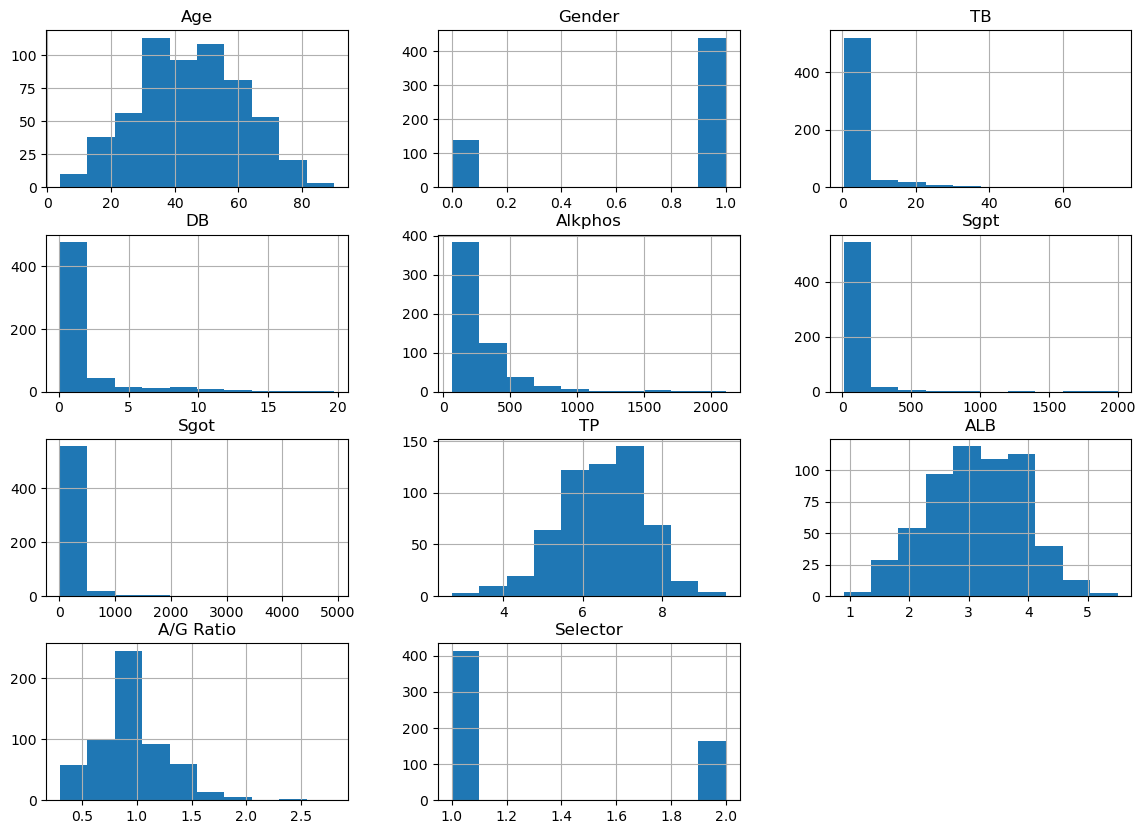

In [17]:
#check the distribution of variables
df.hist(figsize=(14,10))

The plots suggest that all continuous variables are skewed except for age, TP, ALB and A/G ratio.

Text(0.5, 1.0, 'Visualization of outliers')

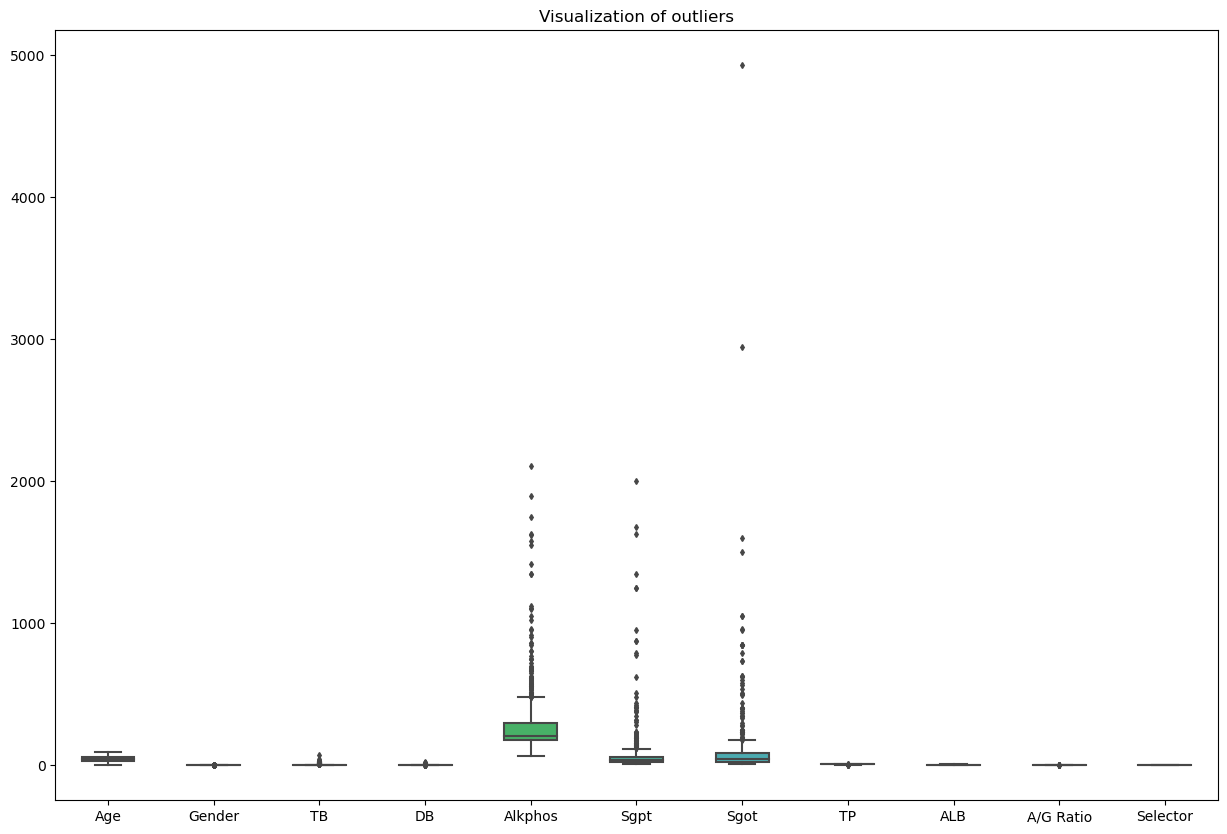

In [18]:
# check if there is any outlier in the data
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers")

It seems that there are outliers in Alkaline Phosphotase, Alamine Aminotransferase and Aspartate Aminotransferase.

All outliers here may have clinical significance, with high values suggesting potential underlying diseases, these cannot be ignored as they are still possible. If uncertain about the outliers, researchers can re-examine the dataset to confirm whether there were any errors in data entry, etc.

## Feature prprocessing

In [4]:
#  extract feature variables (X) and the class variable (y)
X = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values) # class label is contained here

In [5]:
# transform Selector variable into usual conventions followed
y[y == 2] = 0 # no presence of liver disease

In [21]:
# check the distribution of y
np.mean(y), np.std(y), np.var(y) 

(0.7150259067357513, 0.4514021039300415, 0.20376385943246797)

In [22]:
#show imbalance
print ("instances:", y.size)
print ("class label 0:", y[y==0].size)
print ("class label 1:", y[y==1].size)

instances: 579
class label 0: 165
class label 1: 414


These suggest the dataset is highly imbalanced.

Text(0.5, 1.0, 'Correlation Matrix for ILPD')

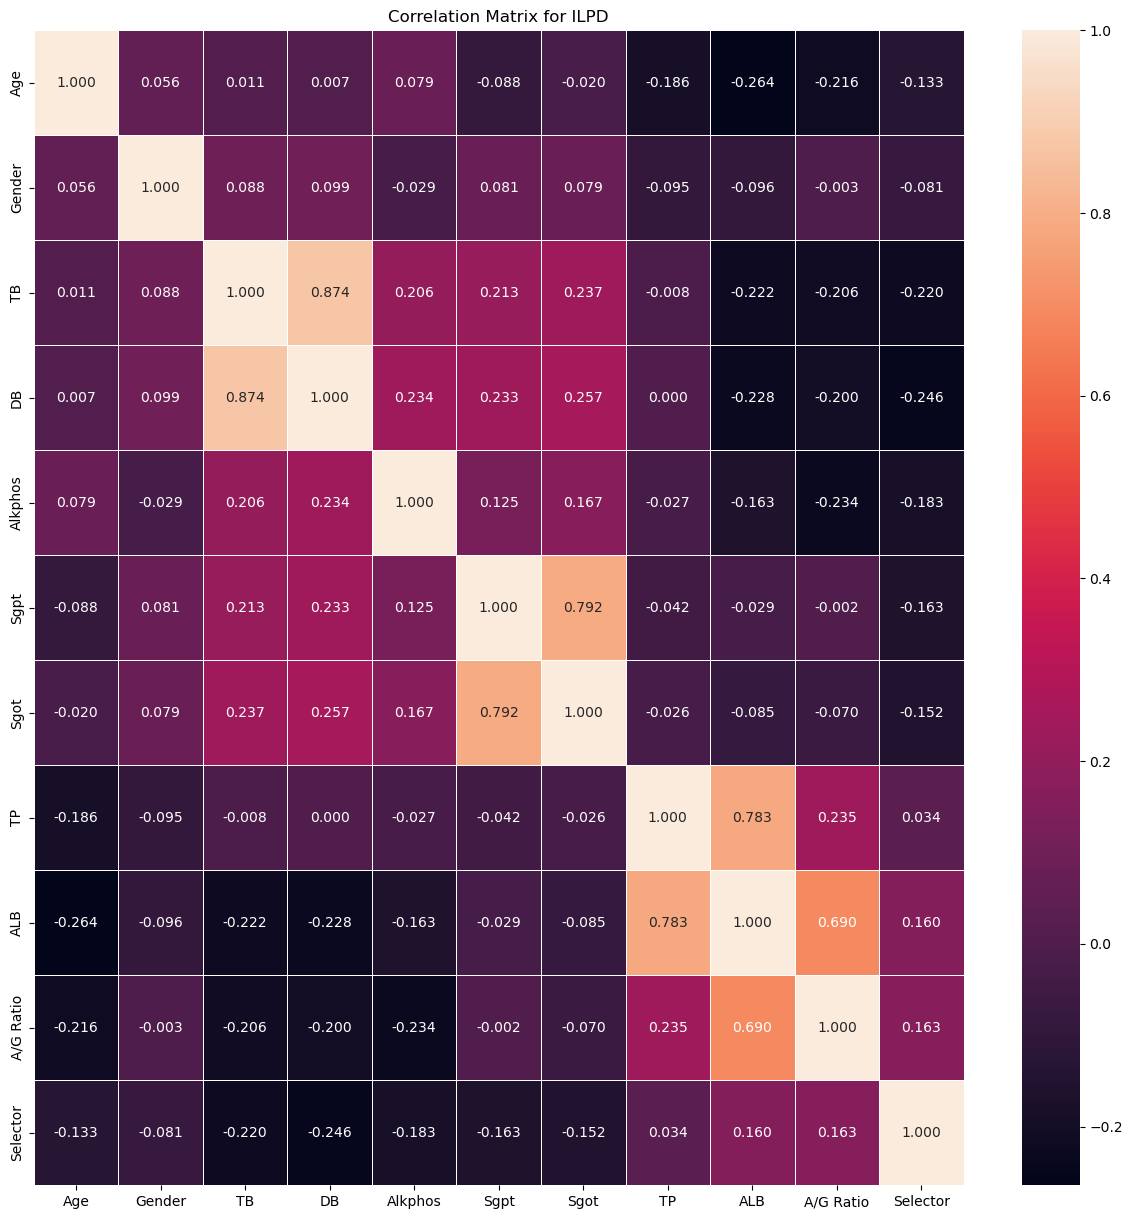

In [23]:
#correlation-matrix
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)
plt.title('Correlation Matrix for ILPD')

The correlation matrix gives us the relationship between two features. As seen above, the following pairs of features seem to be very closely related as indicated by their high correlation coefficients:

Total Bilirubin(TB) and Direct Bilirubin(DB): 0.87

Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase: 0.79

Albumin(ALB) and Total Proteins(TP): 0.78

Albumin(ALB) and Albumin-Globulin Ratio(A/G Ratio): 0.69

In [24]:
# numerical feature with higher correlation to the presence of liver diseases 
corr[abs(corr['Selector']) > 0.1]['Selector']

Age         -0.133164
TB          -0.220218
DB          -0.246273
Alkphos     -0.183363
Sgpt        -0.163117
Sgot        -0.151834
ALB          0.159770
A/G Ratio    0.163131
Selector     1.000000
Name: Selector, dtype: float64

In [25]:
# get some relevant features of the liver disease
feature1 = X[:, 4] # Alkphos
feature2 = X[:, 3] # DB
feature3 = X[:, 5] # Sgpt
feature4 = X[:, 9] # A/G Ratio
feature5 = X[:, 0] #Age

## Feature space

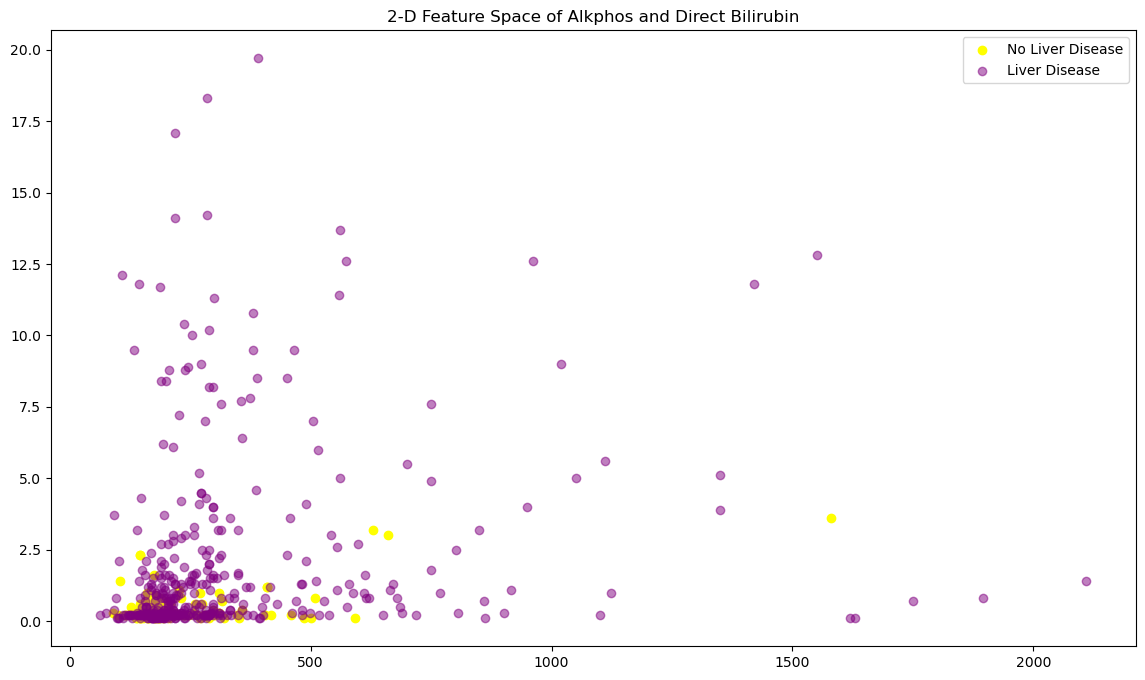

In [26]:
# plot the feature space of Alkphos and Direct Bilirubin

plt.figure(figsize=(14,8))

scatter0 = plt.scatter(feature1[y == 0], feature2[y == 0], c='yellow', label="No Liver Disease")
scatter1 = plt.scatter(feature1[y == 1], feature2[y == 1], c='purple', label="Liver Disease", alpha=0.5) 

plt.title('2-D Feature Space of Alkphos and Direct Bilirubin')
plt.legend()

plt.show()

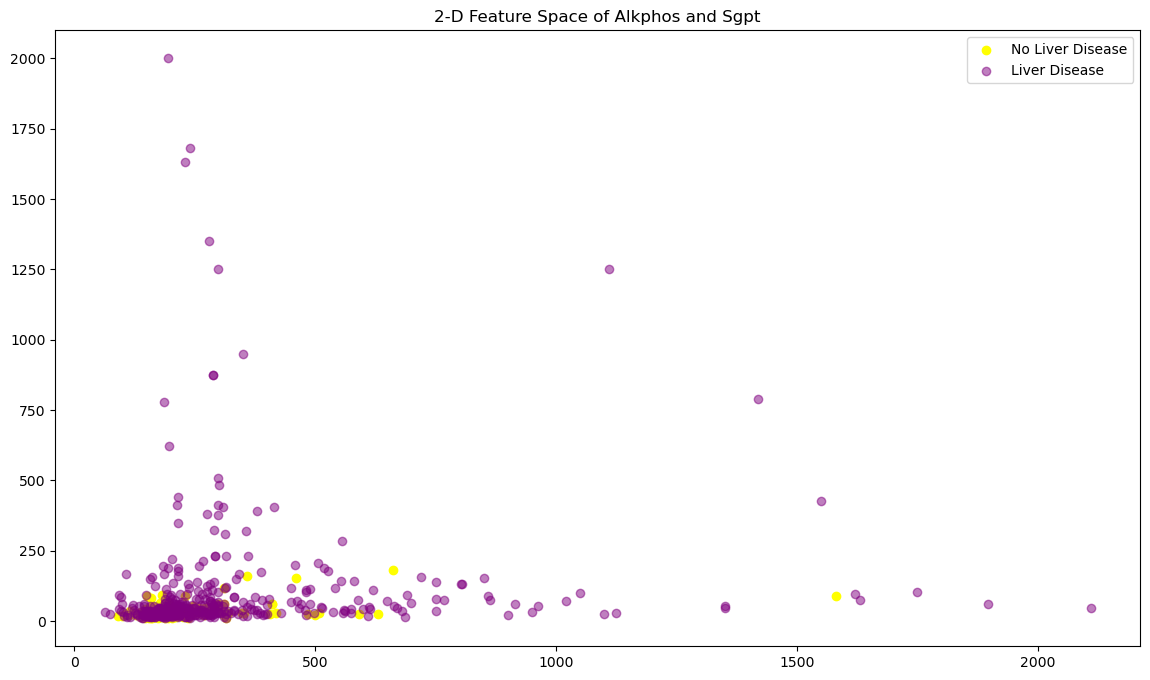

In [27]:
# plot the feature space of Alkphos and Sgpt

plt.figure(figsize=(14,8))
scatter2 = plt.scatter(feature1[y == 0], feature3[y == 0], c='yellow', label="No Liver Disease")
scatter3 = plt.scatter(feature1[y == 1], feature3[y == 1], c='purple', label="Liver Disease", alpha=0.5) 
plt.title('2-D Feature Space of Alkphos and Sgpt')
plt.legend()

plt.show()

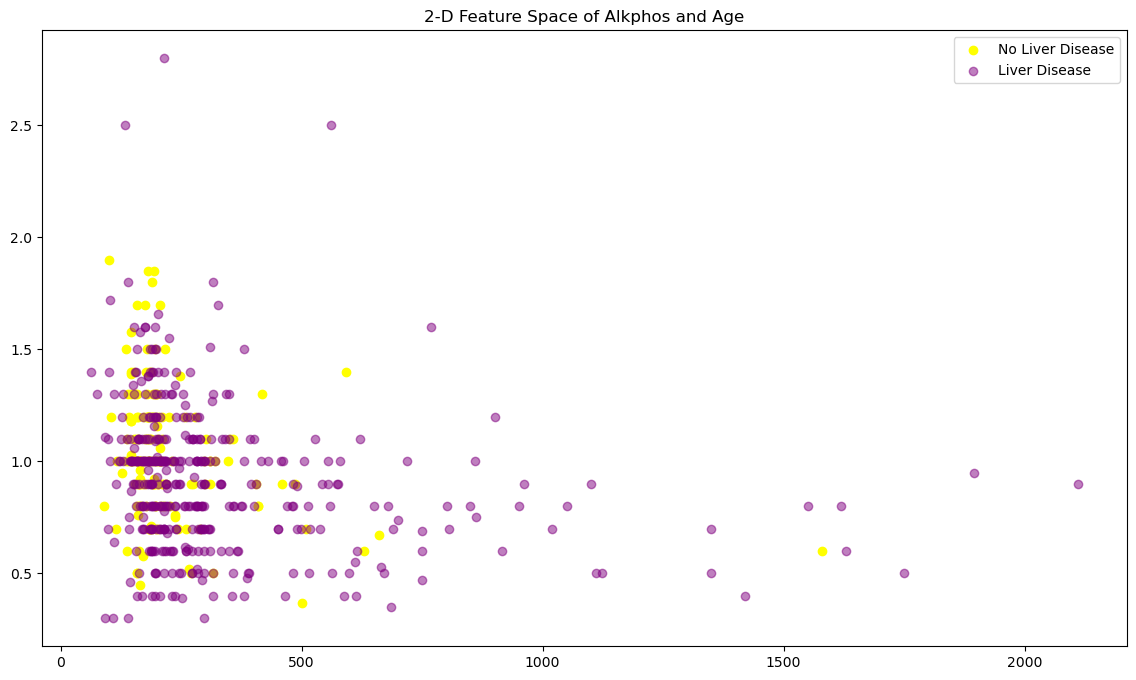

In [28]:
# plot the feature space of Alkphos and Age
plt.figure(figsize=(14,8))
scatter4 = plt.scatter(feature1[y == 0], feature4[y == 0], c='yellow', label="No Liver Disease")
scatter5 = plt.scatter(feature1[y == 1], feature4[y == 1], c='purple', label="Liver Disease", alpha=0.5) 
plt.title('2-D Feature Space of Alkphos and Age')
plt.legend()

plt.show()

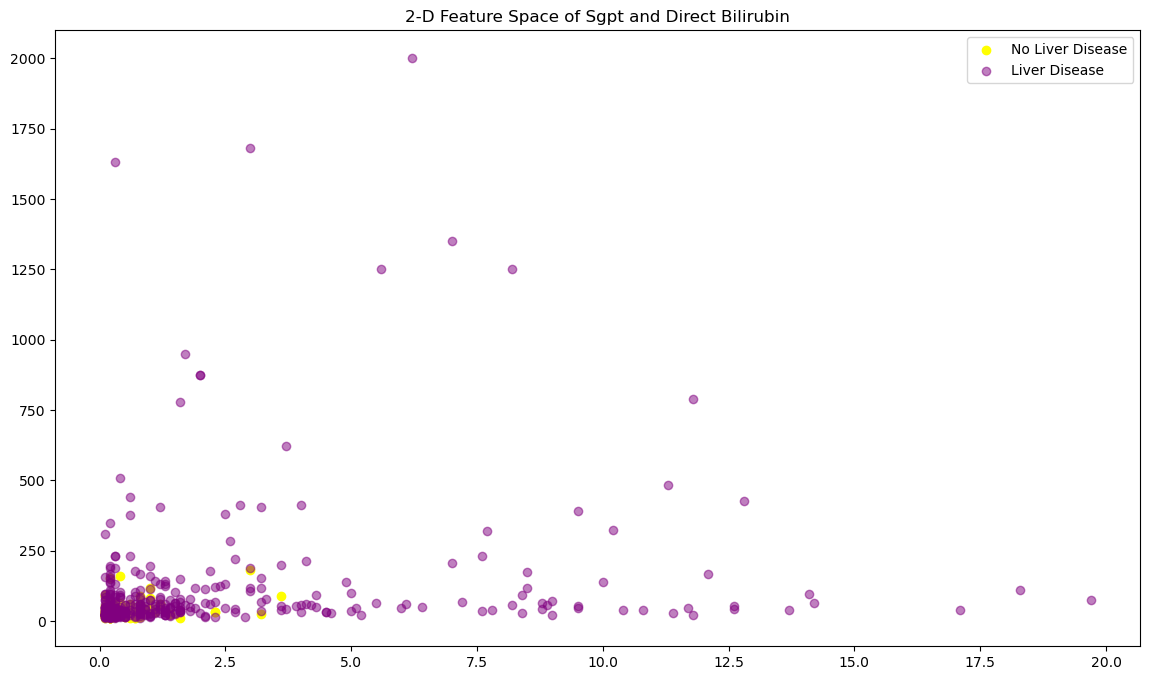

In [29]:
# plot the feature space of Sgpt and Direct Bilirubin
plt.figure(figsize=(14,8))
scatter6 = plt.scatter(feature2[y == 0], feature3[y == 0], c='yellow', label="No Liver Disease")
scatter7 = plt.scatter(feature2[y == 1], feature3[y == 1], c='purple', label="Liver Disease", alpha=0.5) 
plt.title('2-D Feature Space of Sgpt and Direct Bilirubin')
plt.legend()

plt.show()

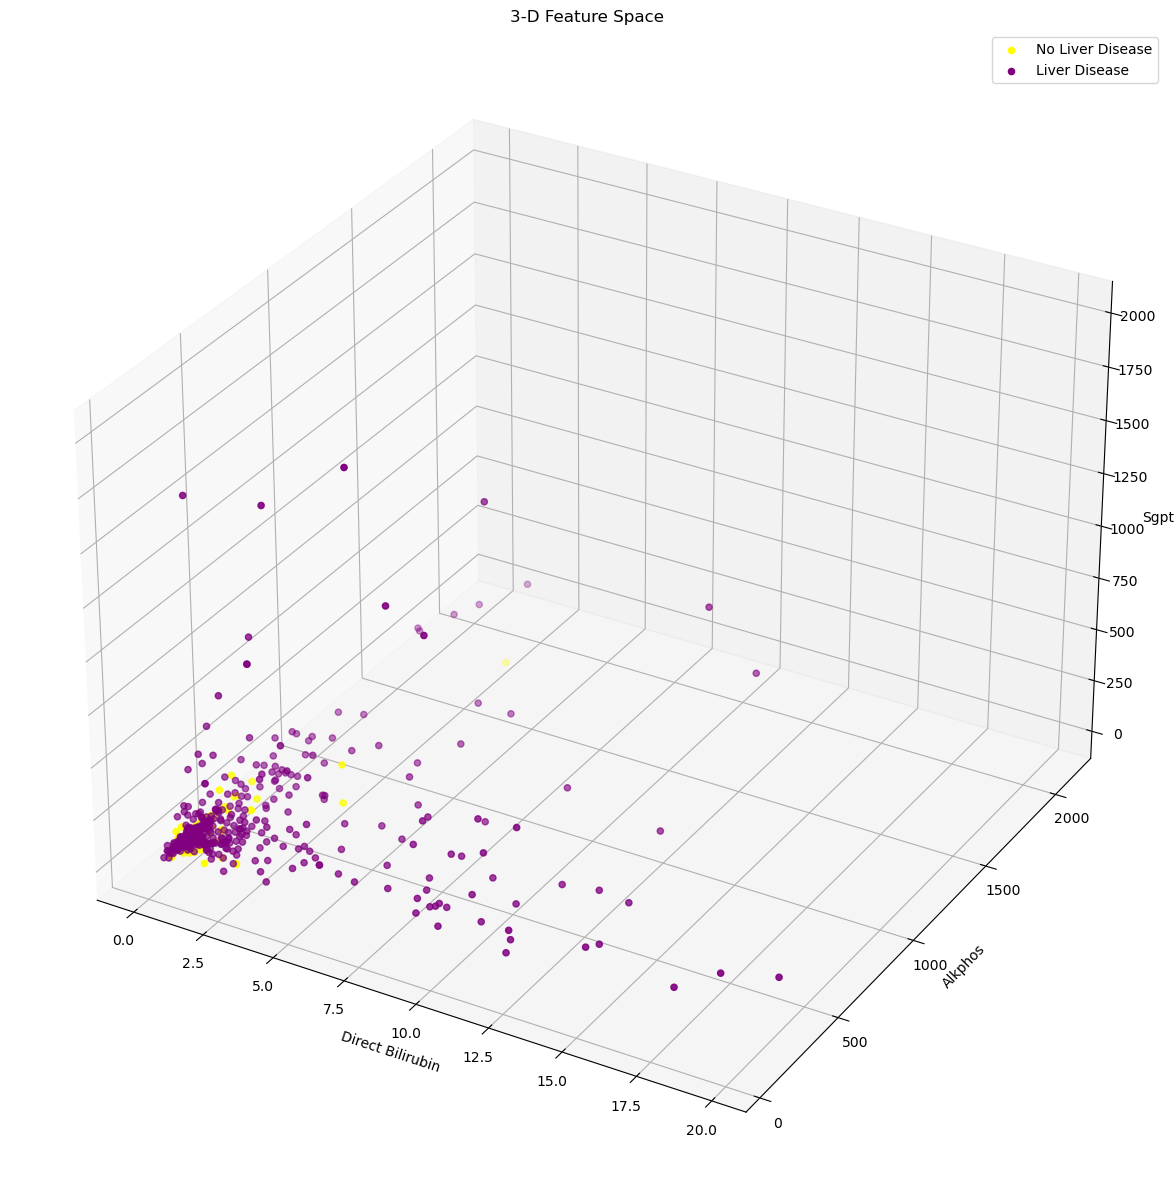

In [32]:
# plot the 3-D feature spce of Direct Bilirubin, Alkphos and Sgpt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111, projection='3d')

# Scatter plot for class 0
class0 = ax1.scatter(feature2[y == 0], feature1[y == 0], feature3[y == 0], c='yellow', label='No Liver Disease')
# Scatter plot for class 1
class1 = ax1.scatter(feature2[y == 1], feature1[y == 1], feature3[y == 1], c='purple', label='Liver Disease')

ax1.set_xlabel('Direct Bilirubin')
ax1.set_ylabel('Alkphos')
ax1.set_zlabel('Sgpt')
ax1.set_title('3-D Feature Space')
ax1.legend()

plt.show()

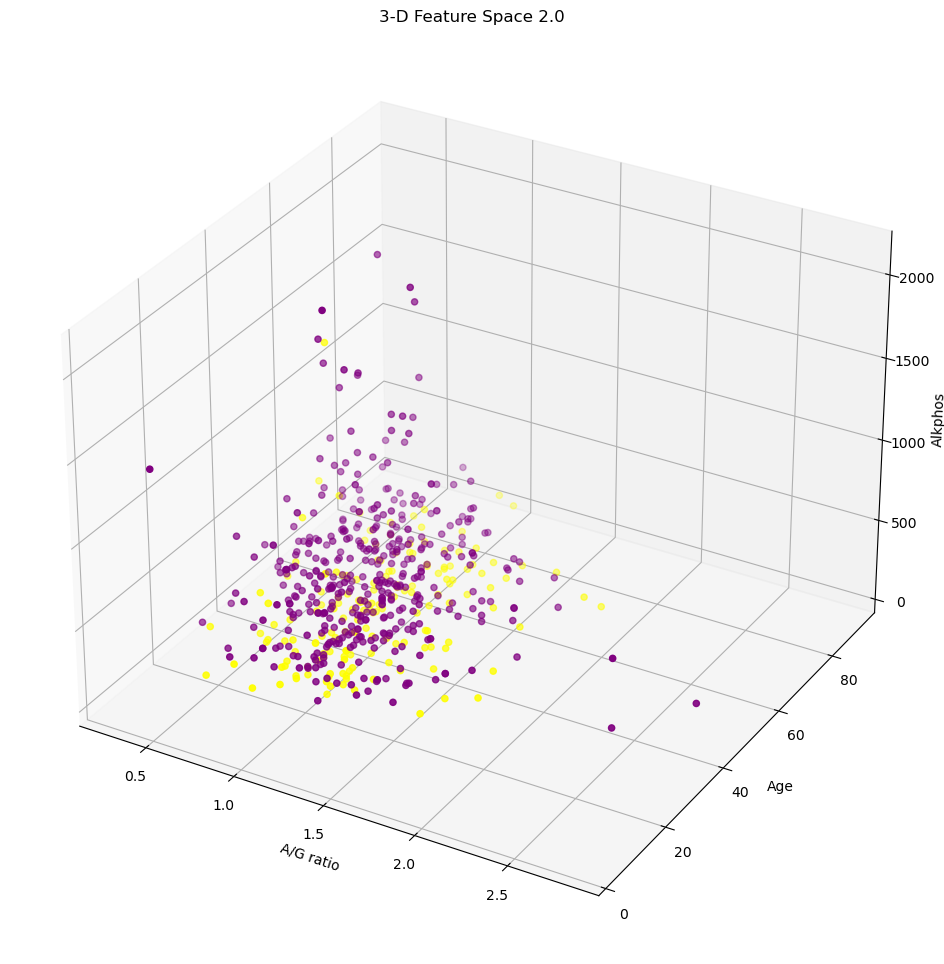

In [33]:
# plot the 3-D feature spce of A/G ratio, Alkphos and Age
fig = plt.figure(figsize=(14,12))
ax2 = fig.add_subplot(111, projection='3d')

# Scatter plot for class 0
class0 = ax2.scatter(feature4[y == 0], feature5[y == 0], feature1[y == 0], c='yellow', label='No Liver Disease')
# Scatter plot for class 1
class1 = ax2.scatter(feature4[y == 1], feature5[y == 1], feature1[y == 1], c='purple', label='Liver Disease')
ax2.set_xlabel('A/G ratio')
ax2.set_ylabel('Age')
ax2.set_zlabel('Alkphos')
ax2.set_title('3-D Feature Space 2.0')

plt.show()

Class distribution is skewed, and it may generate the accuracy paradox. Since the number of records are low (less than a thousand), I choose over-sampling. 

## Oversample

In [30]:
# handle imbalanced classes by oversampling dataset
from imblearn.over_sampling import RandomOverSampler

OS = RandomOverSampler(random_state=42)
osx, osy = OS.fit_resample(X, y)
osx.shape #bigger because of oversampling

(828, 10)

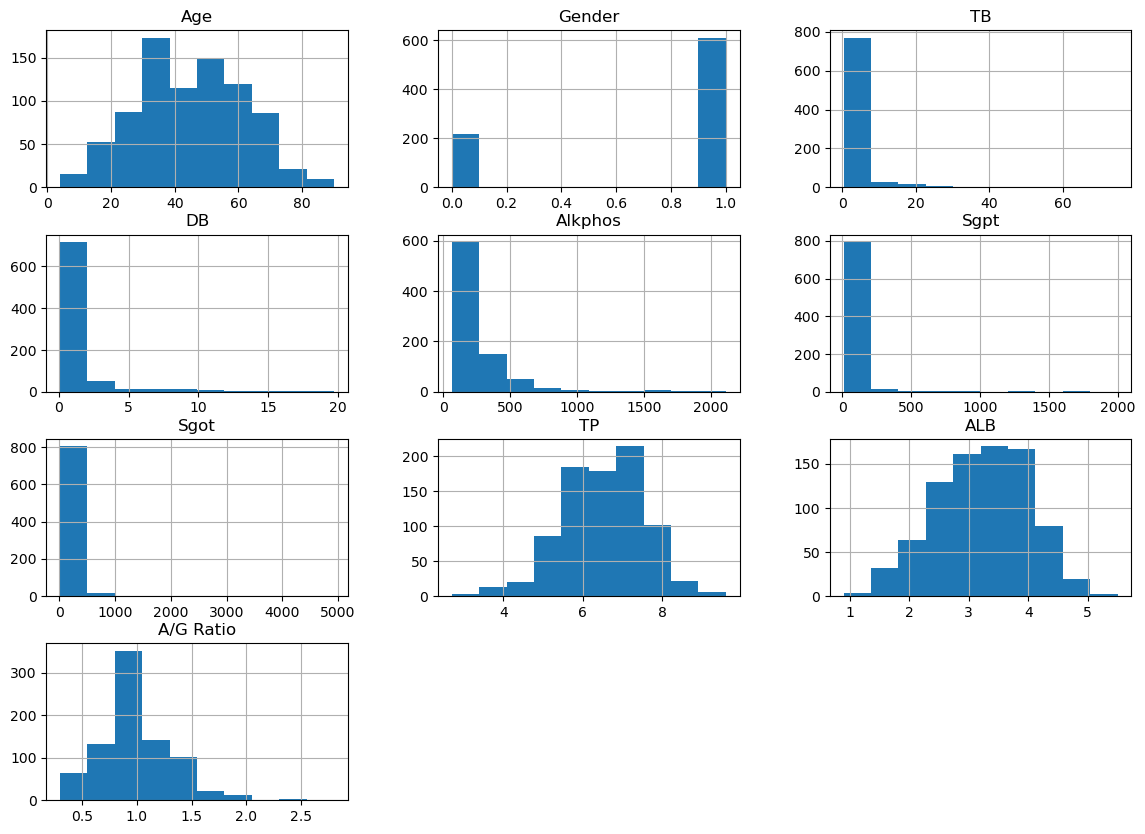

In [35]:
# inspect the osx after the oversampling
data = pd.DataFrame(osx, columns=['Age', 'Gender', 'TB', 'DB','Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio'])

# plot the distribution of variables after oversampling
data.hist(figsize=(14,10))
plt.show()

In [37]:
# show the descriptive statistics about the features after oversampling 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,828.0,44.862319,16.449781,4.0,33.00,45.0,58.000,90.0
Gender,828.0,0.735507,0.441329,0.0,0.00,1.0,1.000,1.0
TB,828.0,2.665580,5.332267,0.4,0.70,0.9,1.900,75.0
DB,828.0,1.166667,2.427463,0.1,0.20,0.2,0.900,19.7
Alkphos,828.0,268.902174,219.969639,63.0,166.75,198.0,280.500,2110.0
Sgpt,828.0,67.317633,155.435735,10.0,22.00,31.0,53.250,2000.0
Sgot,828.0,90.643720,245.500801,10.0,23.75,37.0,71.000,4929.0
TP,828.0,6.519324,1.050301,2.7,5.90,6.6,7.200,9.6
ALB,828.0,3.218961,0.780717,0.9,2.70,3.2,3.900,5.5
A/G Ratio,828.0,0.980857,0.315869,0.3,0.80,1.0,1.165,2.8


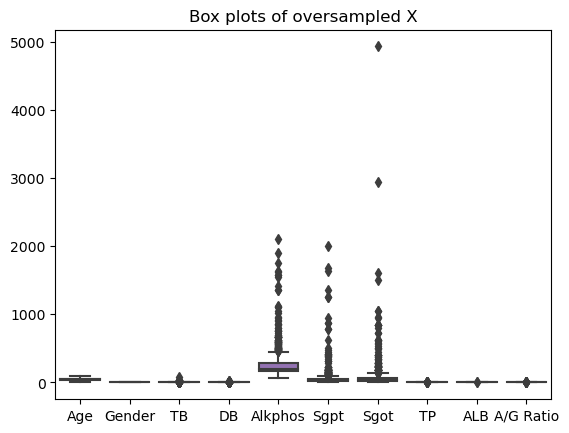

In [38]:
# Box plot for each feature after data preprocessing
sns.boxplot(data=data)
plt.title('Box plots of oversampled X')
plt.show()

The plots of oversampled X seem fine.

## Data standardlization

Different features have different units and scales. Data standardlization can help algorithms converge faster. Furthermore, some algorithms can perform better when the feature scales are standardized. 

I choose the MinMaxScaler from sklearn, because it can preserves the shape of the original distribution and does not reduce the importance of outliers. There are other methods avaliable such as StandardScaler, etc.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
dataset_scaled = scalar.fit_transform(osx)

## Dataset partitioning

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset_scaled, osy,test_size=0.30, random_state=420)

## Model training

Applying SVM and Randaom forest to modelling of heart disease.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(C = 0.1, kernel = 'rbf', probability=True, random_state=42)

## Feature selection

Working on model: Random forest
The Random forest model training took 0.3690 seconds.
Working on model: SVM
The SVM model training took 0.1653 seconds.


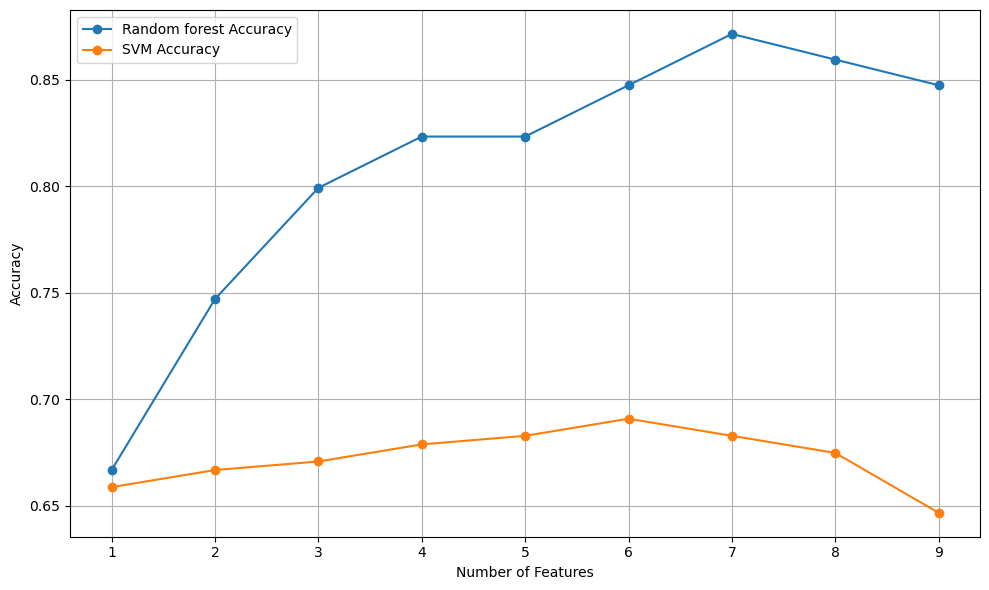

In [34]:
import time
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc, recall_score, precision_score
from sklearn.feature_selection import SequentialFeatureSelector

models = {"Random forest": rfc, "SVM": svm}
model_scores = {"Random forest": [], "SVM": []}
model_features = {"Random forest": [], "SVM": []}

for key, model in models.items():
    print(f"Working on model: {key}")
    
    # Capture the start time
    start_time = time.time()
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Capture the end time and print the training time
    training_time = time.time() - start_time
    print(f"The {key} model training took {training_time:.4f} seconds.")
    
    for i in range(1, 10):
        # Apply backward sequential feature selection
        sfs = SequentialFeatureSelector(model, n_features_to_select=i, direction="backward")
        sfs.fit(x_train, y_train)
        selected_features = sfs.get_support(indices=True)

        # Train the model with the selected features
        model.fit(x_train[:, selected_features], y_train)

        # Make predictions and calculate performance
        y_pred = model.predict(x_test[:, selected_features])
        score = accuracy_score(y_test, y_pred)

        # Store the performance and features
        model_scores[key].append(score)
        model_features[key].append(selected_features)

# Plotting the performance of feature subsets for each model
plt.figure(figsize=(10, 6))
for key in models.keys():
    k_feat = [len(k) for k in model_features[key]]
    plt.plot(k_feat, model_scores[key], marker='o', label=f"{key} Accuracy")

plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
model_features 

{'Random forest': [array([0], dtype=int64),
  array([0, 3], dtype=int64),
  array([0, 3, 5], dtype=int64),
  array([0, 1, 3, 5], dtype=int64),
  array([0, 1, 3, 5, 6], dtype=int64),
  array([0, 1, 3, 4, 5, 6], dtype=int64),
  array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
  array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
  array([0, 1, 2, 3, 4, 5, 6, 7, 9], dtype=int64)],
 'SVM': [array([3], dtype=int64),
  array([3, 4], dtype=int64),
  array([3, 4, 9], dtype=int64),
  array([3, 4, 5, 9], dtype=int64),
  array([0, 3, 4, 5, 9], dtype=int64),
  array([0, 3, 4, 5, 8, 9], dtype=int64),
  array([0, 2, 3, 4, 5, 8, 9], dtype=int64),
  array([0, 2, 3, 4, 5, 6, 8, 9], dtype=int64),
  array([0, 1, 2, 3, 4, 5, 6, 8, 9], dtype=int64)]}

In [36]:
# Print the 7th array of the list associated with 'Random forest'
b4_rf=model_features['Random forest'][6]
print(b4_rf)  
print([columns[i] for i in b4_rf])

# Print the 4th array of the list associated with 'SVM'
b4_svm = model_features['SVM'][5]
print(b4_svm) 
print([columns[i] for i in b4_svm])

[0 1 2 3 4 5 6]
['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot']
[0 3 4 5 8 9]
['Age', 'DB', 'Alkphos', 'Sgpt', 'ALB', 'A/G Ratio']


In [37]:
# Get feature importances
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the feature importances in descending order

print("Feature ranking:")

for f in range(len(importances)): 
    print(f"{f + 1}. feature {indices[f]} (importance: {importances[indices[f]]:.3f})")

Feature ranking:
1. feature 4 (importance: 0.170)
2. feature 5 (importance: 0.147)
3. feature 0 (importance: 0.140)
4. feature 6 (importance: 0.132)
5. feature 2 (importance: 0.115)
6. feature 7 (importance: 0.102)
7. feature 3 (importance: 0.100)
8. feature 8 (importance: 0.075)
9. feature 1 (importance: 0.018)


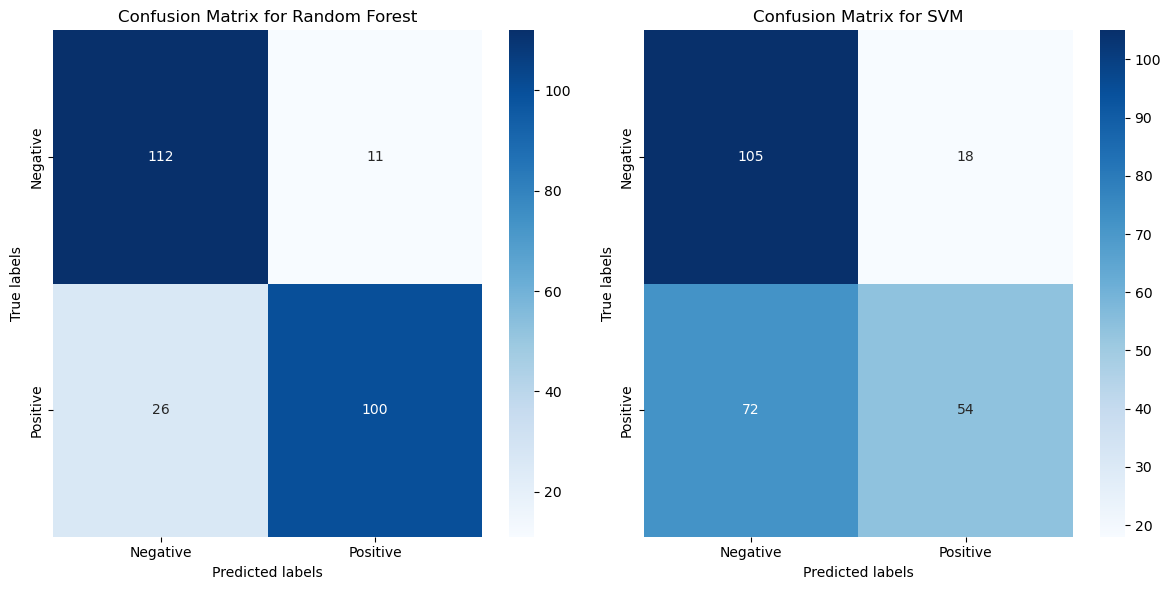

In [38]:
for key, model in models.items():   
    # Train the model
    model.fit(x_train, y_train)

# Predict the test set results
y_pred_rf = rfc.predict(x_test)
y_pred_svm = svm.predict(x_test)

# Compute confusion matrix for each model
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)  # Annotate the cells with the numeric values
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])  # Adjust these based on your class labels
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting confusion matrix for Random Forest
plot_confusion_matrix(cm_rf, 'Confusion Matrix for Random Forest', axes[0])

# Plotting confusion matrix for SVM
plot_confusion_matrix(cm_svm, 'Confusion Matrix for SVM', axes[1])

plt.tight_layout()
plt.show()


precision= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    precision[key] = precision_score(y_test, model.predict(x_test))

recall= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    recall[key] = recall_score(y_test, model.predict(x_test)) 
    
f1score= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    f1score[key] = f1_score(y_test, model.predict(x_test))

In [39]:
precision_frame = pd.DataFrame(precision, index=["Precision"]).T
precision_frame.sort_values(by=["Precision"], axis=0 ,ascending=False, inplace=True)
precision_frame

,Precision
Random forest,0.900901
SVM,0.750000


In [40]:
recall_frame = pd.DataFrame(recall, index=[ "Recall"]).T
recall_frame.sort_values(by=[ "Recall"], axis=0 ,ascending=False, inplace=True)
recall_frame

,Recall
Random forest,0.793651
SVM,0.428571


In [41]:
f1_frame = pd.DataFrame(f1score, index=["F-1 score"]).T
f1_frame.sort_values(by=["F-1 score"], axis=0 ,ascending=False, inplace=True)
f1_frame

,F-1 score
Random forest,0.843882
SVM,0.545455


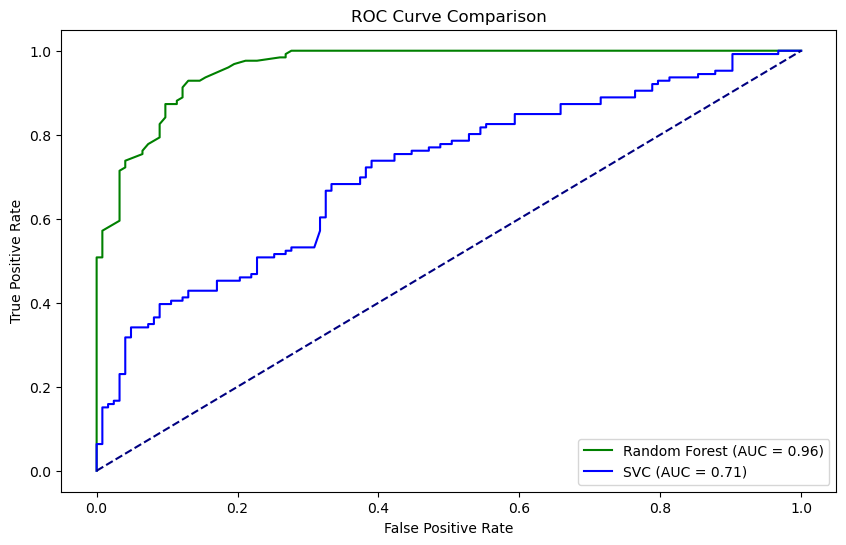

In [42]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
rfc_probs = rfc.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
rfc_auc = auc(rfc_fpr, rfc_tpr)

svm_probs = svm.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest (AUC = {rfc_auc:.2f})', color='green')
plt.plot(svm_fpr, svm_tpr, label=f'SVC (AUC = {svm_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

The performance of both models are shown above, and Random forest classifier outperforms SVM classifier.

## Cross validation

Using ten-fold cross validation to assess model performance

In [11]:
# Import the cross_val_score function from the sklearn library
from sklearn.model_selection import cross_val_score

# Random Forest Classifier (rfc) Cross-Validation
rfc_scores = cross_val_score(estimator=rfc,  # Machine learning model to evaluate
                             X=x_train,     # Features from the training data
                             y=y_train,     # Target variable from the training data
                             cv=10,         # Number of folds in a (Stratified) K-Fold Cross-Validator
                             n_jobs=1)      # Number of jobs to run in parallel (1 means no parallelism)
# Print the array of scores obtained from the cross-validation of the rfc model
print('CV accuracy scores for rfc: %s' % rfc_scores)
# Calculate and print the mean and standard deviation of the scores to gauge performance and variability
print('CV accuracy for rfc: %.3f +/- %.3f' % (np.mean(rfc_scores), np.std(rfc_scores)))

# Support Vector Machine (svm) Cross-Validation
svm_scores = cross_val_score(estimator=svm,  # Machine learning model to evaluate
                             X=x_train,     # Features from the training data
                             y=y_train,     # Target variable from the training data
                             cv=10,         # Number of folds in a (Stratified) K-Fold Cross-Validator
                             n_jobs=1)      # Number of jobs to run in parallel (1 means no parallelism)
# Print the array of scores obtained from the cross-validation of the svm model
print('CV accuracy scores for svm: %s' % svm_scores)
# Calculate and print the mean and standard deviation of the scores to gauge performance and variability
print('CV accuracy for svm: %.3f +/- %.3f' % (np.mean(svm_scores), np.std(svm_scores)))


CV accuracy scores for rfc: [0.79310345 0.82758621 0.75862069 0.86206897 0.82758621 0.81034483
 0.81034483 0.79310345 0.75862069 0.87719298]
CV accuracy for rfc: 0.812 +/- 0.037
CV accuracy scores for svm: [0.65517241 0.63793103 0.55172414 0.63793103 0.60344828 0.63793103
 0.65517241 0.65517241 0.67241379 0.59649123]
CV accuracy for svm: 0.630 +/- 0.034


## Hyperparameters tuning via grid search

In [47]:
# implement gridsearch for SVM
from sklearn.model_selection import GridSearchCV

param_range = [0.1, 1.0, 10.0, 100.0]

svm_params = {
    'C': param_range,  # Regularization parameter
    'kernel': ['rbf', 'linear'],  # Specifies the kernel type to be used in the algorithm
    'gamma': param_range  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

scorings = ['accuracy', 'roc_auc', 'f1_macro', 'recall_macro', 'precision_macro']
results = []

for score in scorings:
    start_time = time.time()
    gs = GridSearchCV(estimator=svm, param_grid=svm_params, scoring=score, cv=5)
    gs.fit(x_train, y_train)
    stop_time = time.time()
    results.append({
        'Scoring': score,
        'Best Score': gs.best_score_,
        'Best Parameters': gs.best_params_,
        'Elapsed Time': stop_time - start_time
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

In [48]:
# Results for optimal parameters of SVM for different scorings
results_df

,Scoring,Best Score,Best Parameters,Elapsed Time
0,accuracy,0.829010,"{'C': 100.0, 'gamma': 100.0, 'kernel': 'rbf'}",13.556106
1,roc_auc,0.894507,"{'C': 10.0, 'gamma': 100.0, 'kernel': 'rbf'}",14.433768
2,f1_macro,0.828503,"{'C': 100.0, 'gamma': 100.0, 'kernel': 'rbf'}",13.778141
3,recall_macro,0.828793,"{'C': 100.0, 'gamma': 100.0, 'kernel': 'rbf'}",14.248814
4,precision_macro,0.833028,"{'C': 100.0, 'gamma': 100.0, 'kernel': 'rbf'}",13.766354


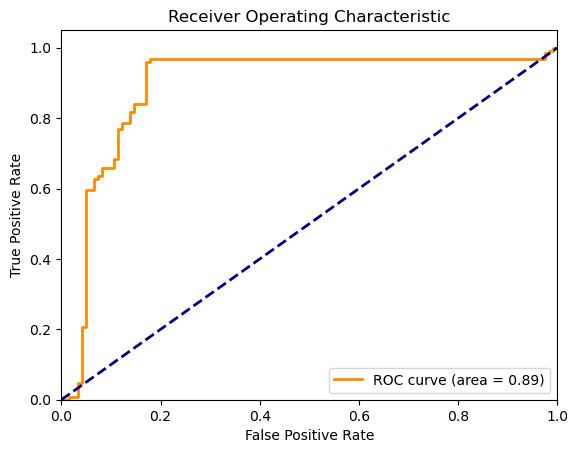

Evaluation criteria for optimized SVM:

Accuracy: 0.8232931726907631
F1 Score: 0.8181818181818182
Recall: 0.7857142857142857
Precision: 0.853448275862069


In [49]:
# Initialize the SVM model with optimized parameters
svm_op = SVC(kernel='rbf', C=100, gamma=100, probability=True, random_state=6)

# Train the optimized SVM model
svm_op.fit(x_train,y_train)

# Make predictions on the test set
svm_prediction = svm_op.predict(x_test)
svm_probabilities = svm_op.predict_proba(x_test)[:, 1]

# Evaluation criteria
svm_conf_matrix = confusion_matrix(y_test, svm_prediction)
svm_accuracy = accuracy_score(y_test, svm_prediction)
svm_f1 = f1_score(y_test, svm_prediction)
svm_recall = recall_score(y_test, svm_prediction)
svm_precision = precision_score(y_test, svm_prediction)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print evaluation criteria
print("Evaluation criteria for optimized SVM:\n")

print('Accuracy:', svm_accuracy)
print('F1 Score:', svm_f1)
print('Recall:', svm_recall)
print('Precision:', svm_precision)

In [50]:
# implement gridsearch for Random forest classifiers

rfc_grid = {
    'n_estimators': [10, 50, 100, 300],
    'max_depth': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

results_2 = []

for score in scorings:
    start_time = time.time()
    gs_2 = GridSearchCV(estimator= rfc, param_grid= rfc_grid, scoring=score, cv=5)
    gs_2.fit(x_train, y_train)
    stop_time = time.time()
    results_2.append({
        'Scoring': score,
        'Best Score': gs_2.best_score_,
        'Best Parameters': gs_2.best_params_,
        'Elapsed Time': stop_time - start_time
    })

# Convert results into a DataFrame
results2_df = pd.DataFrame(results_2)

In [52]:
# Results for optimal parameters of Random Forest for different scorings
results2_df

,Scoring,Best Score,Best Parameters,Elapsed Time
0,accuracy,0.808366,"{'criterion': 'entropy', 'max_depth': 15, 'n_e...",36.522388
1,roc_auc,0.926454,"{'criterion': 'entropy', 'max_depth': 15, 'n_e...",37.394610
2,f1_macro,0.805769,"{'criterion': 'entropy', 'max_depth': 15, 'n_e...",37.518290
3,recall_macro,0.807921,"{'criterion': 'entropy', 'max_depth': 15, 'n_e...",35.505905
4,precision_macro,0.822939,"{'criterion': 'entropy', 'max_depth': 15, 'n_e...",35.681073


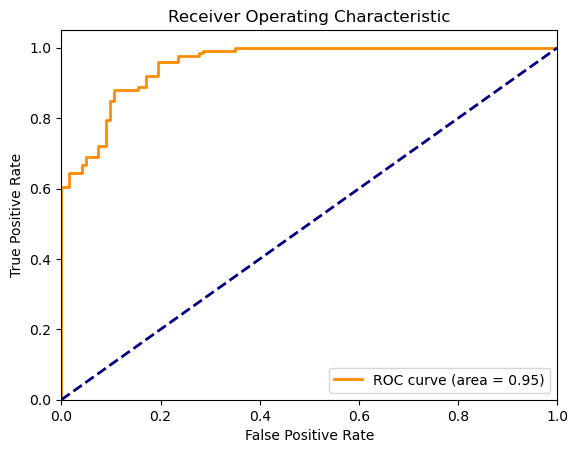

Evaluation criteria for optimized RFC:

Accuracy: 0.8433734939759037
F1 Score: 0.8340425531914893
Recall: 0.7777777777777778
Precision: 0.8990825688073395


In [53]:
# Initialize the Random Forest model with optimized parameters
rfc_op =  RandomForestClassifier(n_estimators= 100, max_depth = 15, criterion = 'entropy', random_state=6)

# Train the optimized SVM model
rfc_op.fit(x_train,y_train)

# Make predictions on the test set
rfc_prediction = rfc_op.predict(x_test)
rfc_probabilities = rfc_op.predict_proba(x_test)[:, 1]

# Evaluation criteria
rfc_conf_matrix = confusion_matrix(y_test, rfc_prediction)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)
rfc_precision = precision_score(y_test, rfc_prediction)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rfc_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print evaluation criteria
print("Evaluation criteria for optimized RFC:\n")

print('Accuracy:', rfc_accuracy)
print('F1 Score:', rfc_f1)
print('Recall:', rfc_recall)
print('Precision:', rfc_precision)

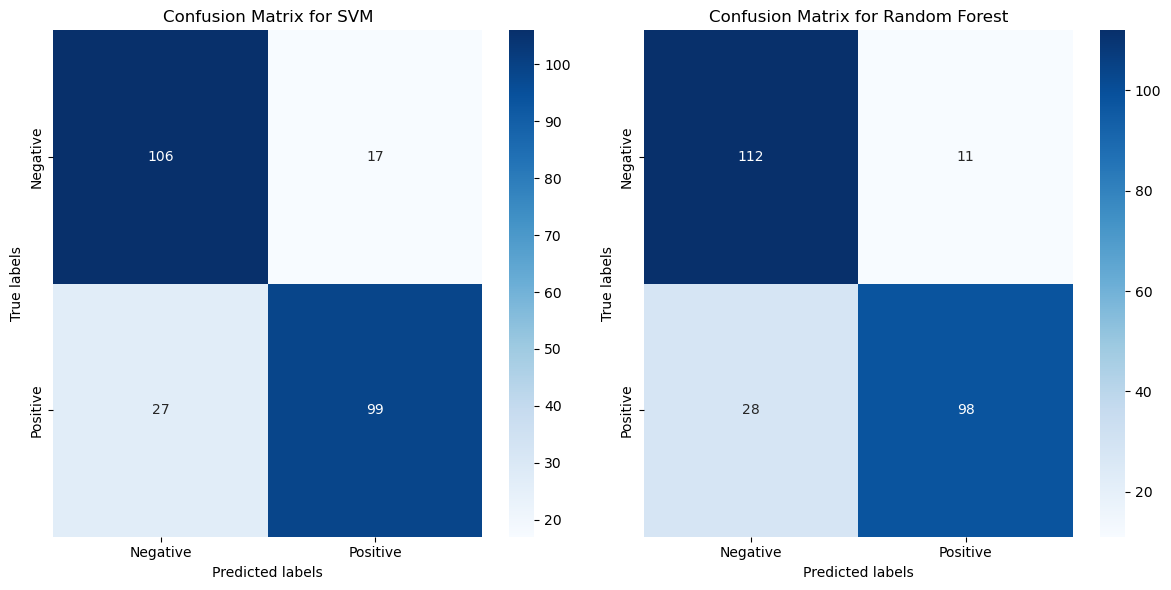

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting confusion matrix for SVM and RF
plot_confusion_matrix(svm_conf_matrix, 'Confusion Matrix for SVM', axes[0])
plot_confusion_matrix(rfc_conf_matrix, 'Confusion Matrix for Random Forest', axes[1])
plt.tight_layout()
plt.show()